In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [10]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [11]:
#Lets load the Bosten House pricing Dataset 
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [12]:
df= fetch_california_housing()

In [13]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [14]:
## Lets cheak the discription of the dataset

In [15]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [16]:
print(df.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [17]:
print(df.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [18]:
print(df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [19]:
##Preparing the dataset

In [20]:
dataset= pd.DataFrame(df.data, columns= df.feature_names)

In [21]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
dataset['price']= df.target

In [23]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
#you can cheak missing or null values or not 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
#summarizing the stats of the data 
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
#cheak the missing values 
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [27]:
## Exploratory data analysis 

In [28]:
#correlation #its importent evry regression 
dataset.corr()
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)




In [29]:
# cheak multicoleaniarity
#is the independent relation cheak 


In [30]:
import seaborn as sns 
sns.pairplot(dataset)

ModuleNotFoundError: No module named 'seaborn'

Text(0, 0.5, 'Price')

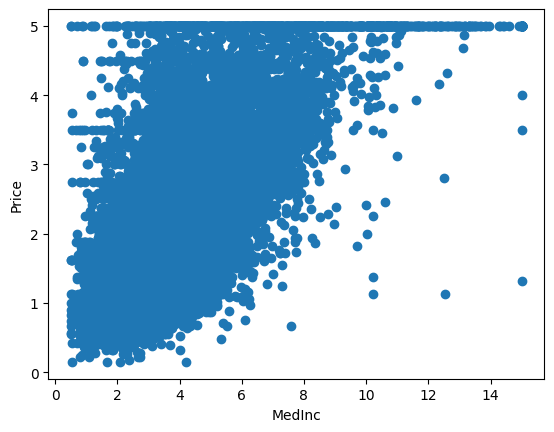

In [31]:
plt.scatter(dataset['MedInc'],dataset['price'])
plt.xlabel('MedInc')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

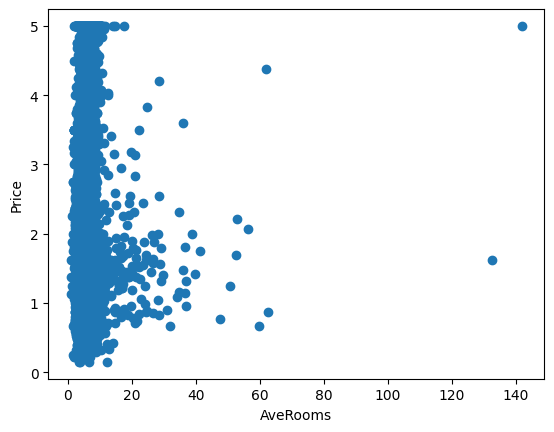

In [32]:

plt.scatter(dataset['AveRooms'],dataset['price'])
plt.xlabel('AveRooms')
plt.ylabel('Price')

In [33]:
import seaborn as sns
sns.regplot(x= 'AveOccup',y= 'price',data= dataset)

ModuleNotFoundError: No module named 'seaborn'

In [34]:
import seaborn as sns
sns.regplot(x= 'Longitude',y= 'price',data= dataset)

ModuleNotFoundError: No module named 'seaborn'

In [35]:
## independent and dependent features 
x = dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [36]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [38]:
#Train test split 

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size= 0.3,random_state= 45)

In [40]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10139,3.4954,8.0,4.510638,1.157447,1281.0,2.725532,33.92,-117.89
16006,6.2561,51.0,6.707746,1.024648,707.0,2.489437,37.74,-122.46
13196,4.1448,33.0,5.961735,1.008929,2769.0,3.531888,34.08,-117.70
12145,2.1848,16.0,5.939734,1.231955,2711.0,1.899790,33.71,-117.21
3227,1.3569,32.0,4.603340,1.091858,1772.0,3.699374,36.32,-119.64
...,...,...,...,...,...,...,...,...
16547,4.0125,20.0,5.538226,1.076453,1191.0,3.642202,37.81,-121.22
16317,2.2130,22.0,4.358178,1.078675,781.0,1.616977,38.00,-121.32
12895,2.8106,24.0,4.886584,1.024896,1496.0,2.069156,38.65,-121.33
6012,3.9784,18.0,4.718954,1.009150,2899.0,3.789542,34.07,-117.78


In [41]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3046,2.4044,34.0,5.478632,1.079772,1101.0,3.136752,35.50,-119.28
6803,2.5750,40.0,4.329596,1.006726,1367.0,3.065022,34.08,-118.13
10112,4.5096,30.0,5.165049,0.993528,845.0,2.734628,33.94,-117.94
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79
5008,3.7727,47.0,4.536082,0.890034,653.0,2.243986,34.01,-118.33
...,...,...,...,...,...,...,...,...
2307,4.0196,17.0,6.139767,1.044925,1888.0,3.141431,36.83,-119.76
19682,1.9375,23.0,4.389381,1.168142,1043.0,2.307522,39.15,-121.62
11159,4.0625,31.0,5.505618,1.067416,1356.0,3.808989,33.82,-118.01
9800,5.5164,40.0,6.228739,1.316716,643.0,1.885630,36.56,-121.92


In [42]:
#Standerd scaling 
#greadient dicent 
#normalize and standerdizing dataset

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [44]:
x_train= scaler.fit_transform(x_train)

In [45]:
x_test= scaler.transform(x_test)

In [46]:
x_train

array([[-0.19544536, -1.64540898, -0.35171175, ..., -0.03067595,
        -0.80045639,  0.83469602],
       [ 1.24918121,  1.7663913 ,  0.48059078, ..., -0.0509243 ,
         0.98878541, -1.44204784],
       [ 0.14437443,  0.33819583,  0.19798863, ...,  0.03847992,
        -0.72551432,  0.92935276],
       ...,
       [-0.55378935, -0.3759019 , -0.20929714, ..., -0.08696899,
         1.41501841, -0.8790893 ],
       [ 0.05730019, -0.85196705, -0.27279807, ...,  0.06057728,
        -0.7301982 ,  0.88949729],
       [ 1.54792331,  0.57622841,  0.59941898, ..., -0.03200802,
        -0.66930777,  0.72509347]])

In [47]:
#Model Training

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
regression= LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [50]:
#print the coefficient 
#imp other one intercept

In [51]:
print(regression.coef_)

[ 0.82513488  0.11622628 -0.27607114  0.31662085 -0.00411476 -0.04459174
 -0.92188742 -0.89615597]


In [52]:
print(regression.intercept_)

2.069162980343304


In [53]:
#on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [54]:
#prediction with test data 

In [55]:
regression_pred= regression.predict(x_test)

In [56]:
regression_pred

array([1.39809227, 1.70185743, 2.32837495, ..., 2.23093415, 3.59016747,
       2.37125681])

In [57]:
#plot a scatter plot for the prediction 

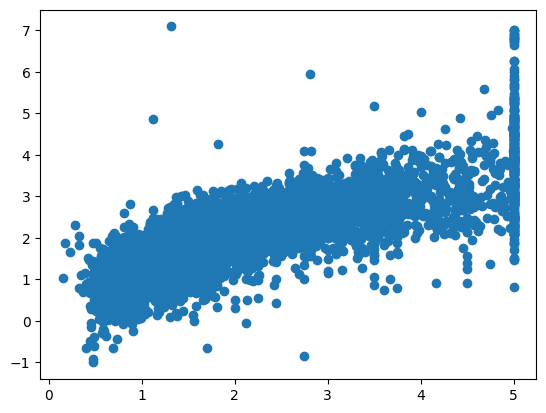

In [58]:
plt.scatter(y_test,regression_pred)

In [59]:
#Residual means error 
residuals= y_test,regression_pred
residuals

(3046     0.658
 6803     2.284
 10112    2.411
 3126     1.375
 5008     1.930
          ...  
 2307     0.842
 19682    0.653
 11159    2.259
 9800     3.691
 5892     2.588
 Name: price, Length: 6192, dtype: float64,
 array([1.39809227, 1.70185743, 2.32837495, ..., 2.23093415, 3.59016747,
        2.37125681]))

In [60]:
#prediction this residuals

sns.displot(residuals,kind='kde')

NameError: name 'sns' is not defined

In [61]:
#scatter plot with respect to prediction and residual
#uniform distribution


In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(y_test,regression_pred))
print (mean_squared_error(y_test,regression_pred))
print (np.sqrt(mean_squared_error(y_test,regression_pred)))

0.5312203951363121
0.5236042973435989
0.7236050700096005


In [63]:
#R square and adjested R square 


In [64]:
#formula
#R^2=1-SSR/SST
#R^2= Coefficient of determination SSR = Some of squres of residuals SST = Total sum of squares

In [65]:
from sklearn.metrics import r2_score
score= r2_score(y_test,regression_pred)
print(score)

0.6025525827236999


In [66]:
#Adjested R^2= 1-[(1-R2)*(n-1)(n-k-1)]
#where:
#R2 the R2 OF the model n . the number of observation k: the number  of predictor variables

In [67]:
#display adjested R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6020383373188463

In [68]:
#New data prediction

In [69]:
df.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [70]:
#transformation of new data
scaler.transform(df.data[0].reshape(1,-1))

e:\fetch_california_housing\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 2.33190546,  0.97294937,  0.58528849, -0.14650333, -0.988353  ,
        -0.04525371,  1.05435972, -1.32746336]])

In [71]:
regression.predict(scaler.transform(df.data[0].reshape(1,-1)))

e:\fetch_california_housing\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4.12211254])

In [72]:
#Pickling the model file for deployment 
import pickle

In [73]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [74]:
pickled_model= pickle.load(open('regmodel.pkl','rb'))

In [75]:
#prediction
pickled_model.predict(scaler.transform(df.data[0].reshape(1,-1)))

e:\fetch_california_housing\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4.12211254])